In [1]:
import pandas as pd
from typing import List
import os
import time

filled_directory = "../simulation_results/final_analysis_filled_concatenated"
total_time = 2000

In [2]:

def load_data(probability:float):
    # Concatenate all the dataframes in the directory that match the probability
    df = pd.read_csv(os.path.join(filled_directory, f'concatenated_{probability}_vel.csv'), low_memory=False)
    df = df[df['Time'] < total_time]
    return df

def load_filled_data(probability:List[float] = None):
    start_time = time.time()
    # If probability is None, get all files with _vel.csv
    if probability is None or len(probability) == 0:
        files = [f for f in os.listdir(filled_directory) 
                 if f.endswith('_vel.csv')]
    else:
        # Get files that start with realization_ followed by any of the probabilities
        files = []
        for prob in probability:
            prob_files = [f for f in os.listdir(filled_directory)
                         if f.startswith(f'realization_{prob}_') and f.endswith('_vel.csv')]
            files.extend(prob_files)
    dfs = [None] * len(files)
    for i, file in enumerate(files):
        realization_id = file.split('_')[2]
        temp_df = pd.read_csv(os.path.join(filled_directory, file), low_memory=False)
        if probability is None or len(probability) == 0:
            probability = file.split('_')[1]
            temp_df['probability'] = probability
        temp_df['realization'] = realization_id

        dfs[i] = temp_df
    end_time = time.time()
    print(f"Time taken to load data: {end_time - start_time} seconds")
    return pd.concat(dfs, ignore_index=True)

In [23]:
from importlib import reload
import graphs
reload(graphs)
from graphs import plot_comparison_between_probabilities, plot_mean_zombie_percentage_over_time_multiple_dfs, plot_mean_velocity_over_time_multiple_dfs, plot_probability_vs_zombie_percentage, plot_probability_vs_velocity, plot_zombie_percentage_over_time

In [4]:
df_04 = load_data(0.4)
df_045 = load_data(0.45)
df_05 = load_data(0.5)
df_055 = load_data(0.55)
df_06 = load_data(0.6)
df_07 = load_data(0.7)
df_10 = load_data(1.0)

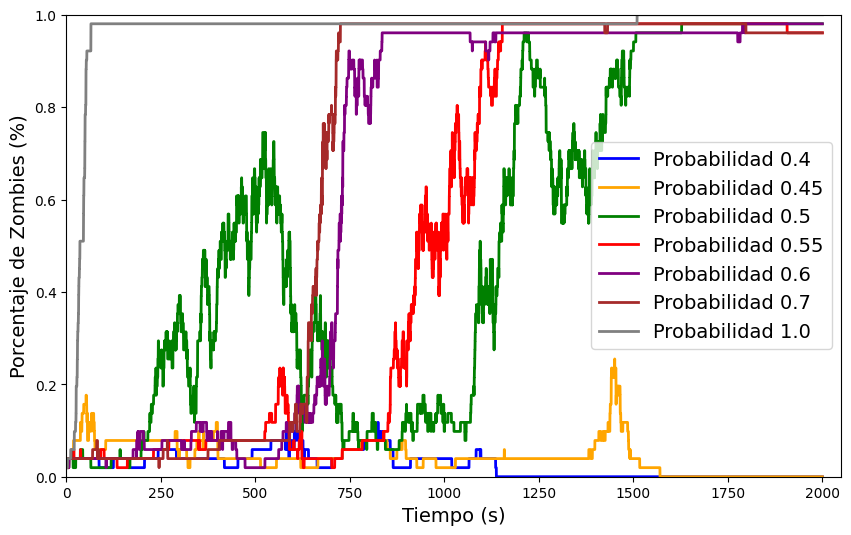

In [5]:
plot_comparison_between_probabilities([df_04, df_045,
                                        df_05, df_055,
                                          df_06, df_07, df_10], [0.4, 0.45,
                                                                  0.5, 0.55,
                                                                    0.6, 0.7, 1.0])

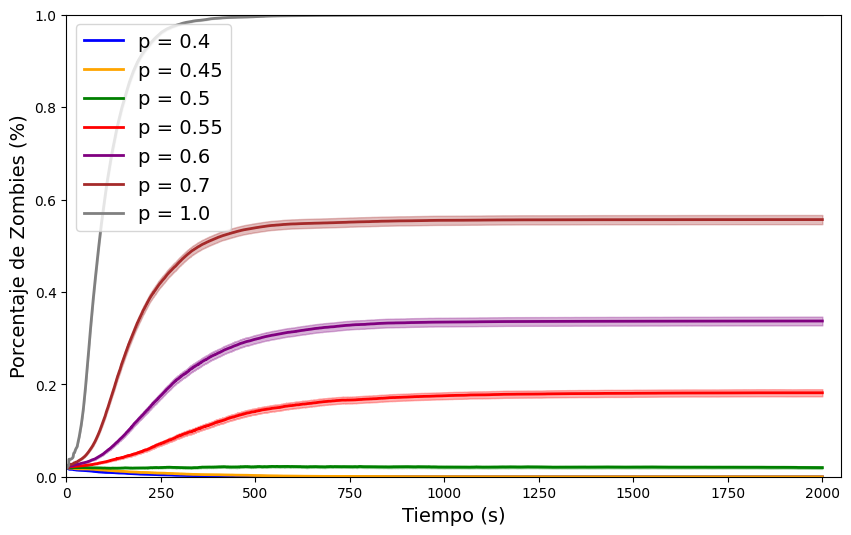

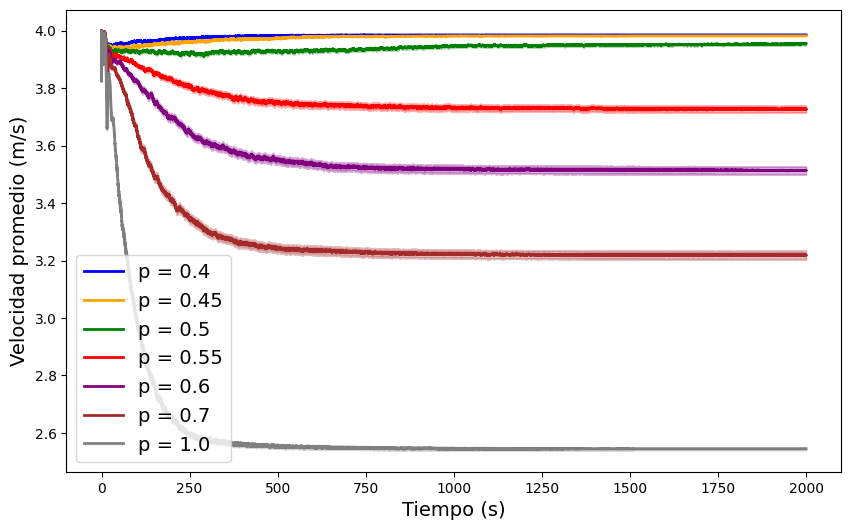

In [6]:
plot_mean_zombie_percentage_over_time_multiple_dfs([df_04, df_045, df_05, df_055, df_06, df_07, df_10], [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 1.0])

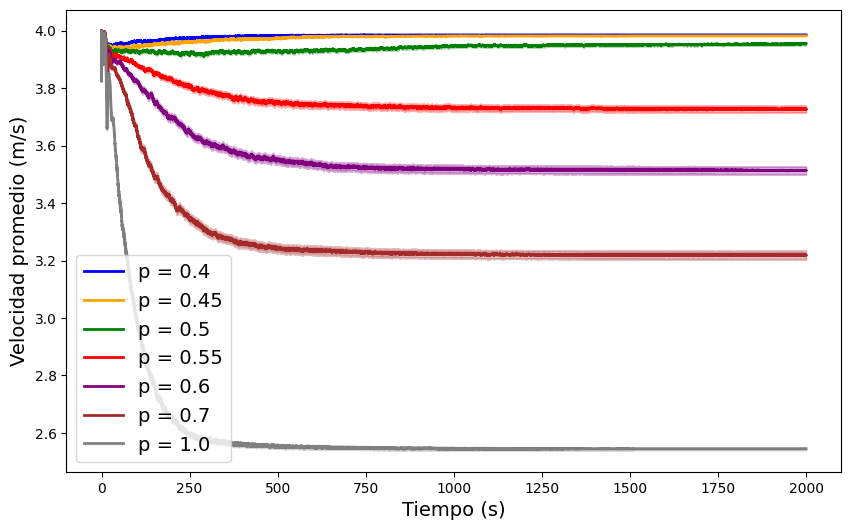

In [15]:
plot_mean_velocity_over_time_multiple_dfs([df_04, df_045, df_05, df_055, df_06, df_07, df_10], [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 1.0])

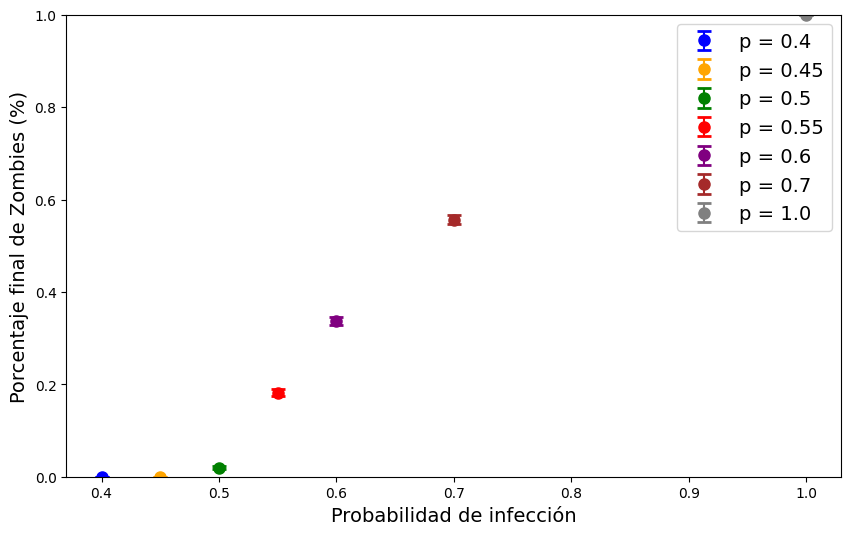

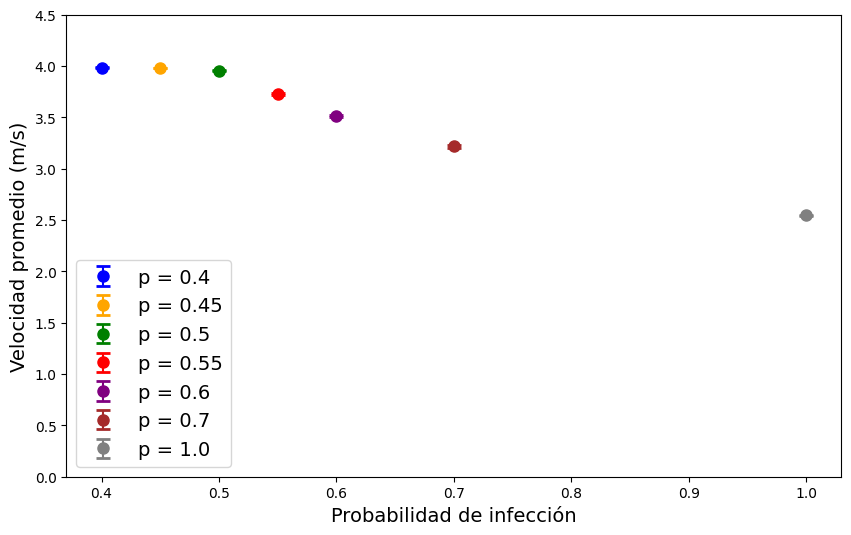

In [17]:
plot_probability_vs_zombie_percentage([df_04, df_045, df_05, df_055, df_06, df_07, df_10], [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 1.0])
plot_probability_vs_velocity([df_04, df_045, df_05, df_055, df_06, df_07, df_10], [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 1.0])

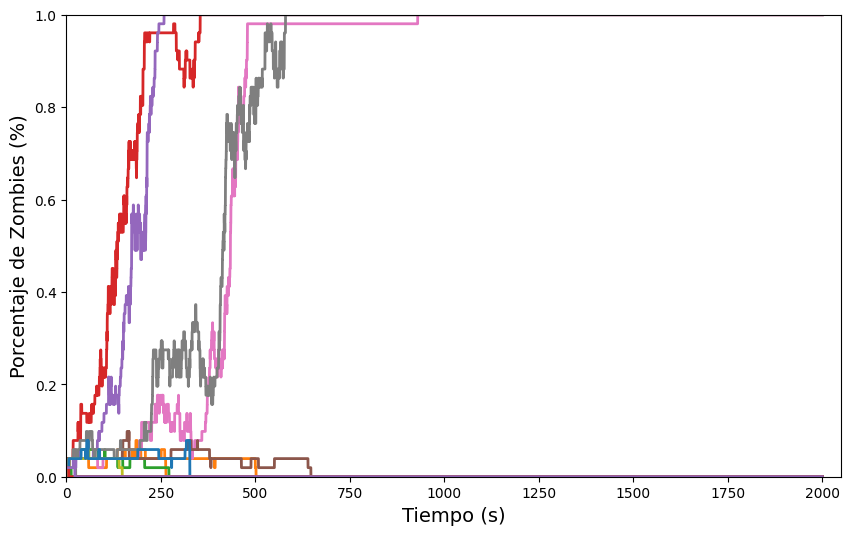

In [24]:
plot_zombie_percentage_over_time(df_055)